In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.constants as sci
plt.rcParams["font.family"] = "Arial"
DPI = 300
Z = 22
TEMP = 310
import matplotlib as mpl
from matplotlib import cm
mpl.rcParams['axes.linewidth'] = 1.4

In [2]:
deg_pols = 21
Xini = 2.88
Xfin = 6.0

np_labels = ["N40"]
ion_labels = ["I0", "I10", "I20", "I50", "I90", "I150"]
q_vals = [40]
i_vals = [0, 33, 66, 170, 300, 500]
c_np = cm.Blues(np.linspace(0.3, 1, len(np_labels)))
c_ion = cm.YlOrRd(np.linspace(0.3, 1, len(ion_labels)))
X = np.linspace(Xini, Xfin, 300)

In [3]:
def read_file(fname):
    f = open(fname, "r")
    fl = f.readlines()
    f.close()
    data = []
    for line in fl:
        if "#" not in line and "@" not in line:
            data.append(line.split())
    data = np.array(data, dtype = 'float')
    data = np.nan_to_num(data)
    return data

def ma(data, n):
    cumsum, moving_aves = [0], []
    for i, x in enumerate(data, 1):
        cumsum.append(cumsum[i-1] + x)
        if i>=n:
            moving_ave = (cumsum[i] - cumsum[i-n])/n
            moving_aves.append(moving_ave)
    return moving_aves

def clean_pmf(pmf, new_space):
    pmf[:,1] = pmf[:,1] - np.mean(pmf[-10:,1])
    """pol_av = np.poly1d(np.polyfit(pmf[:,0], pmf[:,1], deg_pols))
    pol_std = np.poly1d(np.polyfit(pmf[:,0], pmf[:,2], deg_pols))
    new_pmf = np.zeros((len(new_space),3))
    new_pmf[:,0] = new_space
    new_pmf[:,1] = pol_av(new_space)
    new_pmf[:,2] = pol_std(new_space)
    return new_pmf"""
    return pmf

# Short vs long sampling times

In [4]:
PMFshort = []
PMFshort_hists = []
PMFlong = []
PMFlong_hists = []
for np_lab in np_labels:
    pmfshort_ion = []
    pmfshort_ion_hist = []
    pmflong_ion = []
    pmflong_ion_hist = []
    for ion_lab in ion_labels:
        pmfshort = read_file("T2/PMF_L_shortsampling/T2-{}-{}_L_PMF_std.xvg".format(np_lab, ion_lab))
        pmfshort = clean_pmf(pmfshort, X)
        pmfshort_ion.append(pmfshort)
        pmfshort_hist = read_file("T2/PMF_L_shortsampling/T2-{}-{}_L_PMF_hist.xvg".format(np_lab, ion_lab))
        pmfshort_ion_hist.append(pmfshort_hist)
        
        pmflong = read_file("T2/PMF_L/T2-{}-{}_L_PMF_std.xvg".format(np_lab, ion_lab))
        pmflong = clean_pmf(pmflong, X)
        pmflong_ion.append(pmflong)
        pmflong_hist = read_file("T2/PMF_L/T2-{}-{}_L_PMF_hist.xvg".format(np_lab, ion_lab))
        pmflong_ion_hist.append(pmflong_hist)
    PMFshort.append(pmfshort_ion)
    PMFshort_hists.append(pmfshort_ion_hist)
    PMFlong.append(pmflong_ion)
    PMFlong_hists.append(pmflong_ion_hist)
PMFshort = np.array(PMFshort)
PMFlong = np.array(PMFlong)
print(np.shape(PMFshort))
print(np.shape(PMFlong))

(1, 6, 200, 3)
(1, 6, 200, 3)


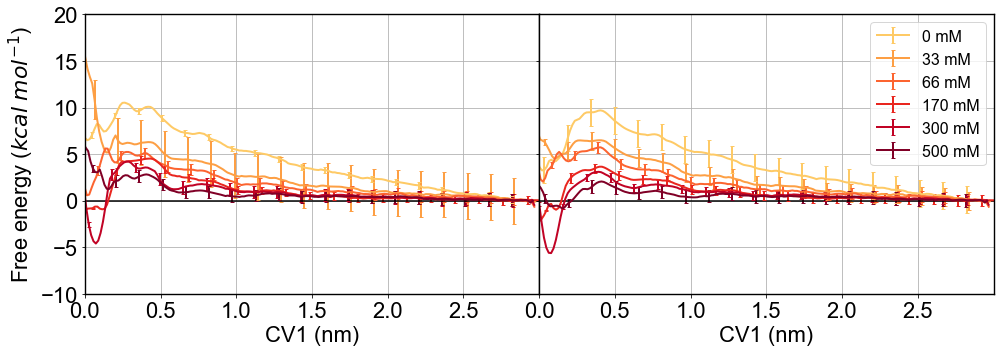

In [5]:
subplot_kw = {'xticks':np.arange(0,3,0.5)}
fig, axs = plt.subplots(figsize=(14,5), ncols=2, nrows=1, sharey=True, subplot_kw=subplot_kw, gridspec_kw={'wspace':0})
for ax in axs:
    ax.set_xlim(0,3)
    ax.tick_params(labelsize=Z)
    ax.set_xlabel("CV1 (nm)", fontsize=Z)
    ax.grid()
    ax.axhline(y=0, c='k', lw=1.5)
    ax.set_ylim(-10, 20)
axs[0].set_ylabel("Free energy ($kcal$ $mol^{-1}$)", fontsize=Z)

for p, (pmf, lab, c) in enumerate(zip(PMFshort[0], i_vals, c_ion)):
    axs[0].errorbar(pmf[:,0]-3.05, pmf[:,1], yerr=pmf[:,2], c=c, label="{} mM".format(lab), lw=2, errorevery=10, capsize=2)

for p, (pmf, lab, c) in enumerate(zip(PMFlong[0], i_vals, c_ion)):
    axs[1].errorbar(pmf[:,0]-3.05, pmf[:,1], yerr=pmf[:,2], c=c, label="{} mM".format(lab), lw=2, errorevery=10, capsize=2)
axs[1].legend(fontsize=Z-6, loc='upper right')
plt.tight_layout()
plt.savefig("ShortLongPMF.png", format='png', dpi=DPI)
plt.show()
plt.close()

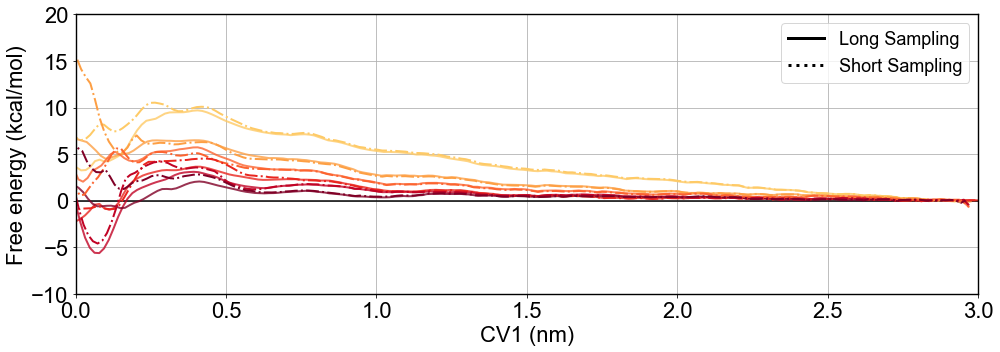

In [6]:
fig = plt.figure(figsize=(14,5))
ax = plt.axes()
ax.set_xlim(0,3)
ax.tick_params(labelsize=Z)
ax.set_xlabel("CV1 (nm)", fontsize=Z)
ax.grid()
ax.axhline(y=0, c='k', lw=1.5)
ax.set_ylim(-10, 20)
ax.set_ylabel("Free energy (kcal/mol)", fontsize=Z)

ax.plot([], [], c='k', lw=3, ls='-', label="Long Sampling")
ax.plot([], [], c='k', lw=3, ls=':', label="Short Sampling")
for p, (pmf, lab, c) in enumerate(zip(PMFlong[0], i_vals, c_ion)):
    ax.plot(pmf[:,0]-3.05, pmf[:,1], c=c, lw=2, ls='-', alpha = 0.8)
for p, (pmf, lab, c) in enumerate(zip(PMFshort[0], i_vals, c_ion)):
    ax.plot(pmf[:,0]-3.05, pmf[:,1], c=c, lw=2, ls='-.')
ax.legend(fontsize=Z-4, loc='upper right')
plt.tight_layout()
plt.savefig("ShortLongPMF2.png", format='png', dpi=DPI)
plt.show()
plt.close()

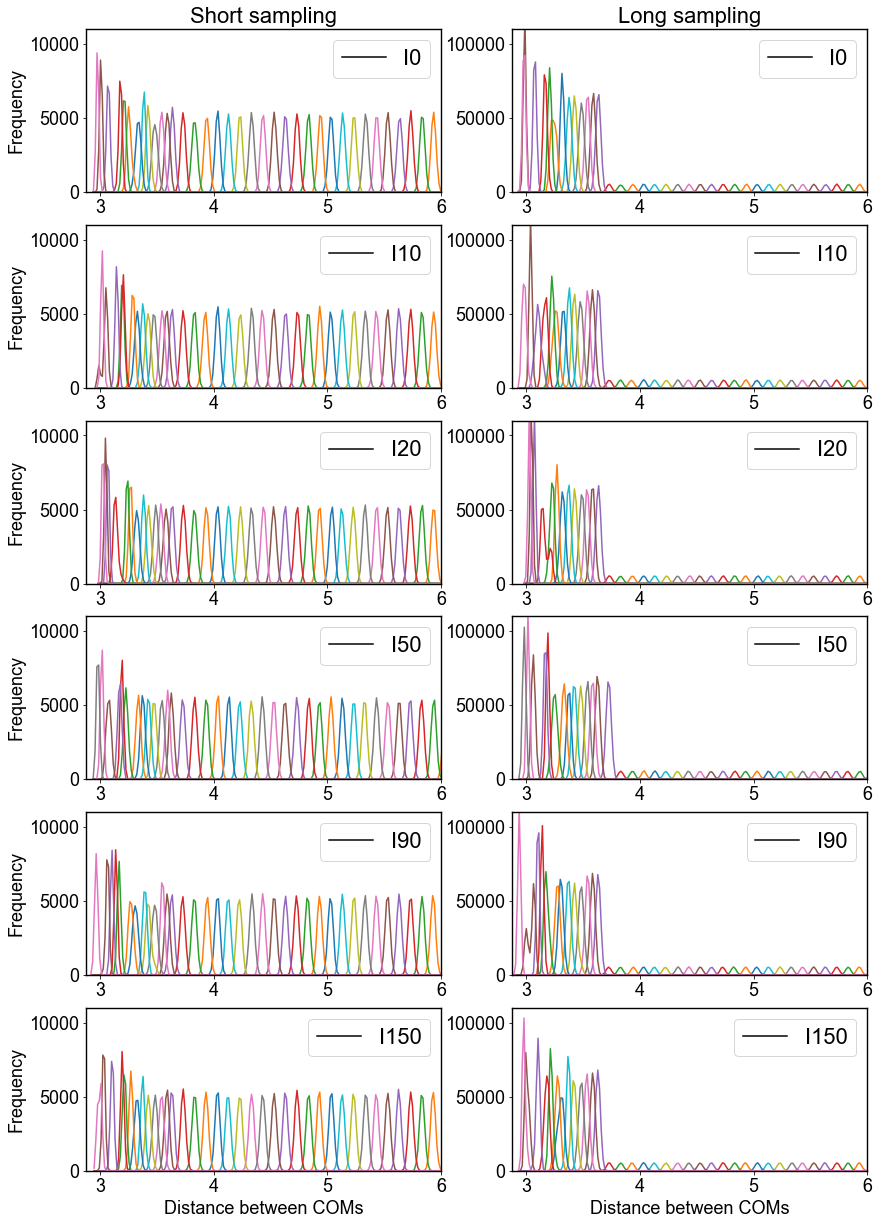

In [7]:
n_cols = 2
n_rows = len(np_labels) * len(ion_labels)
subplot_kw = {'xlim':(Xini, Xfin)}
gridspec_kw = {}
fig, axs = plt.subplots(figsize=(14, n_rows*3.5), ncols=n_cols, nrows=n_rows, subplot_kw=subplot_kw, gridspec_kw=gridspec_kw)
axs[0,0].set_title("Short sampling", fontsize=Z)
axs[0,1].set_title("Long sampling", fontsize=Z)
for ax, hist_short, hist_long, lab in zip(axs, PMFshort_hists[0], PMFlong_hists[0], ion_labels):
    ax[0].plot([],[],'k', label=lab)
    ax[0].legend(fontsize=Z, loc='upper right')
    ax[1].plot([],[],'k', label=lab)
    ax[1].legend(fontsize=Z, loc='upper right')
    ax[0].set_ylim(0, 11000)
    ax[1].set_ylim(0, 110000)
    for j in range(len(hist_short[0,:])):
        ax[0].plot(hist_short[:,0], hist_short[:,j])
    for j in range(len(hist_long[0,:])):
        ax[1].plot(hist_long[:,0], hist_long[:,j])
for ax in axs.flatten():
    ax.tick_params(labelsize=Z-4)
for ax in axs[:,0]:
    ax.set_ylabel("Frequency", fontsize=Z-4)
for ax in axs[-1,:]:
    ax.set_xlabel("Distance between COMs", fontsize=Z-4)
#plt.tight_layout()
plt.savefig("ShortLongPMFhists.png", format='png', dpi=DPI)
plt.show()
plt.close()

In [8]:
all_counts = []
frames_per_charges = {8:[30,31,32,33,34,35],
                     24:[30,31,32,33,34,35],
                     40:[30,31,32,33,34,35],
                     56:[29,30,31,32,33,34],
                     72:[30,31,32,33,34,35],
                     104:[28,29,30,31,32,33]}
nnn = [8,24,40,56,72]
for n in nnn:
    counts = []
    for i in frames_per_charges[n]:
        count = read_file("./T2/COUNTPOLAR/T2-N{}-I0_L_MD{}_polar.sfu".format(n, i))
        counts.append(count)
    all_counts.append(counts)
all_counts = np.array(all_counts)
print(np.shape(all_counts))
c_ion = cm.plasma(np.linspace(0., 0.8, len(all_counts)))

(5, 6, 39, 3)


In [9]:
print(np.max(np.mean(all_counts[2], axis=0)[:,1]))
print(np.mean(np.mean(all_counts[2], axis=0)[-10:,1]))

0.015021666666666668
0.0011153333333333332


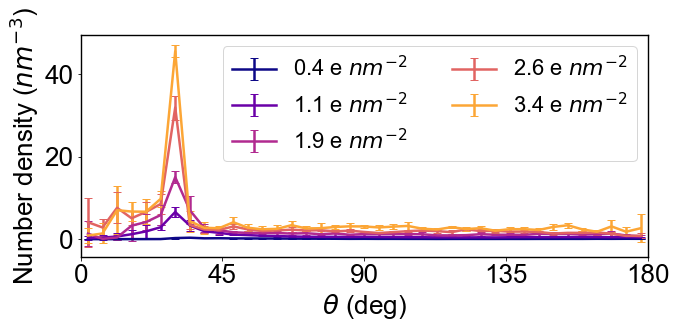

In [10]:
fig = plt.figure(figsize=(9.5,4.5))
ax = plt.axes()
for n, (counts, c, q) in enumerate(zip(all_counts, c_ion, nnn)):
    count_mean = np.mean(counts, axis=0)
    count_std = np.std(counts, axis=0)
    ax.errorbar(counts[0,:,0], count_mean[:,1]*1000, yerr=count_std[:,1]*1000, c=c, label="{:.1f}".format(q/21.24) + r" e $nm^{-2}$", lw=2.5, capsize=4)
       
#ax.grid()
ax.set_xlim(0,180)
ax.set_xticks([0,45,90,135,180])
#ax.set_ylim(0,22)
ax.tick_params(labelsize=Z+4)
ax.set_xlabel(r"$\theta$ (deg)", fontsize=Z+4)
ax.set_ylabel(r"Number density ($nm^{-3}$)", fontsize=Z+4)
ax.legend(fontsize=Z, loc="upper right", ncol=2)
plt.tight_layout()
plt.savefig("ShortLongCountPolar2.png", format='png', dpi=DPI)
plt.show()
plt.close()

In [11]:
all_counts = []

for ion_lab in ion_labels:
    counts = []
    for i in range(30,35):
        count = read_file("./T2/COUNTPOLAR/T2-N40-{}_L_MD{}_polar.sfu".format(ion_lab, i))
        counts.append(count)
    all_counts.append(counts)
all_counts=np.array(all_counts)
print(np.shape(all_counts))
c_ion = cm.plasma(np.linspace(0.3, 0.7, len(all_counts)))

(6, 5, 39, 3)


In [12]:
print(np.max(np.mean(all_counts[0], axis=0)[:,1]))
print(np.mean(np.mean(all_counts[0], axis=0)[-10:,1]))

0.015264
0.0011134


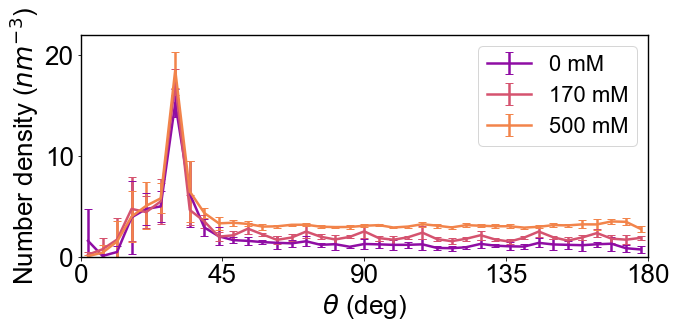

In [13]:
fig = plt.figure(figsize=(9.5,4.5))
ax = plt.axes()
for n, (counts, c, ion) in enumerate(zip(all_counts, c_ion, i_vals)):
    if n in [0,3,5]:
        count_mean = np.mean(counts, axis=0)
        count_std = np.std(counts, axis=0)
        ax.errorbar(counts[0,:,0], count_mean[:,1]*1000, yerr=count_std[:,1]*1000, c=c, label="{} mM".format(ion), lw=2.5, capsize=4)
        #count_mean = np.mean(counts, axis=0)
        #count_std = np.std(counts, axis=0)
        #ax.errorbar(counts[0,:,0], counts[-1,:,1]*1000, c=c, label="{} mM".format(ion), lw=2.5, capsize=4)

#ax.grid()
ax.set_xlim(0,180)
ax.set_xticks([0,45,90,135,180])
ax.set_ylim(0,22)
ax.tick_params(labelsize=Z+4)
ax.set_xlabel(r"$\theta$ (deg)", fontsize=Z+4)
ax.set_ylabel(r"Number density ($nm^{-3}$)", fontsize=Z+4)
ax.legend(fontsize=Z, loc="upper right")
plt.tight_layout()
plt.savefig("ShortLongCountPolar.png", format='png', dpi=DPI)
plt.show()
plt.close()

In [14]:
count_mean = np.mean(all_counts[2], axis=0)
print(count_mean[:,1])
print(np.max(count_mean[:,1]))


[0.0000e+00 8.2000e-05 2.0620e-03 3.9040e-03 5.8600e-03 5.6460e-03
 1.6634e-02 5.4080e-03 3.4620e-03 2.1980e-03 1.9940e-03 2.2600e-03
 1.8240e-03 1.5380e-03 1.7260e-03 1.7080e-03 1.8340e-03 1.7480e-03
 1.4040e-03 1.4520e-03 1.5000e-03 1.4060e-03 1.4340e-03 1.4140e-03
 1.3820e-03 1.3320e-03 1.3560e-03 1.5100e-03 1.6380e-03 1.6820e-03
 1.6840e-03 1.7840e-03 1.7600e-03 1.7440e-03 2.1480e-03 1.2420e-03
 1.3620e-03 1.7340e-03 1.7860e-03]
0.016634


In [15]:
all_residences = []
for ion_lab in ion_labels:
    residences = []
    for i in range(23,36):
        residence = read_file("./T2/RESIDENCETIMES/T2-N40-{}_L_MD{}_restimes.sfu".format(ion_lab, i))
        residences.append(list(residence.flatten()))
    all_residences.append(residences)
all_residences=np.array(all_residences)
print(np.shape(all_residences))

(6, 13)


<ipython-input-15-7b64b1c6638e>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  all_residences=np.array(all_residences)


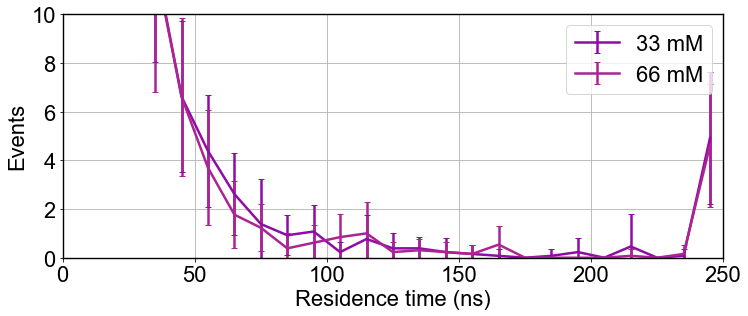

In [16]:
initial_bins = np.arange(0,255,10)
fig = plt.figure(figsize=(10.5, 4.5))
ax = plt.axes()
for residences, c, ion in zip(all_residences[1:3], c_ion, i_vals[1:3]):
    all_hists = []
    for residence in residences:
        hist, bins = np.histogram(residence, bins=initial_bins)
        all_hists.append(hist)
    bins = (bins[1:] + bins[:-1])/2
    all_hists = np.array(all_hists)
    hists_mean = np.mean(all_hists, axis=0)
    hists_std = np.std(all_hists, axis=0)
    ax.errorbar(bins, hists_mean, yerr=hists_std, capsize=3, c=c, label="{} mM".format(ion), lw=2.5)
ax.tick_params(labelsize=Z)
ax.grid()
ax.legend(fontsize=Z, loc='upper right')
ax.set_xlim(0,250)
ax.set_ylim((0,10))
ax.set_xlabel("Residence time (ns)", fontsize = Z)
ax.set_ylabel("Events", fontsize = Z)
plt.tight_layout()
plt.savefig("ShortLongPMFRestimes.png", format='png', dpi=DPI)
plt.show()
plt.close()

The red-er the closer the NPs


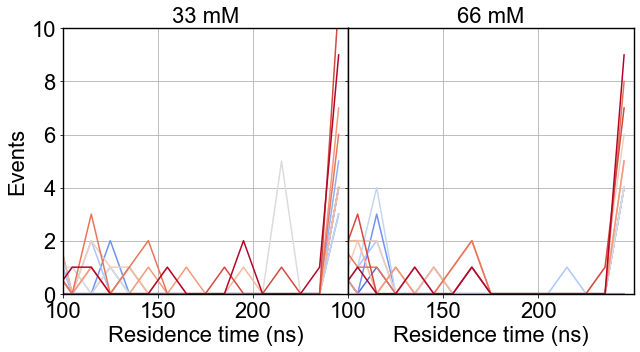

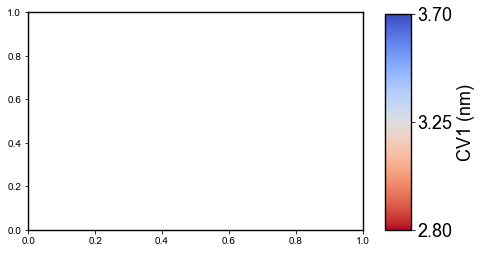

In [17]:
c_cv1 = cm.coolwarm(np.linspace(0, 1, 13))
print("The red-er the closer the NPs")
n_cols = 2
n_rows = 1# len(all_residences)//n_cols
initial_bins = np.arange(0,255,10)
subplot_kw = {'xlim':(100, 250), 'ylim':(0,10), 'yticks':np.arange(0,11,2), 'xticks':np.arange(100,250,50)}
gridspec_kw = {'hspace':0.0, 'wspace':0.0}
fig, axs = plt.subplots(figsize=(9, n_rows*5), ncols=n_cols, nrows=n_rows, sharex=True, sharey=True, subplot_kw=subplot_kw, gridspec_kw=gridspec_kw, squeeze=False)
for ax, residences, ion in zip(axs.flatten(), all_residences[1:3], i_vals[1:3]):
    ax.plot([], [], c='k', lw=3, label="{} mM".format(ion))
    ax.set_title("{} mM".format(ion), fontsize=Z)
    ax.grid()
    for c, residence in zip(c_cv1, residences):
        hist, bins = np.histogram(residence, bins=initial_bins)
        bins = (bins[1:] + bins[:-1])/2
        ax.plot(bins, hist, c=c, lw=1.5)
    
for ax in axs.flatten():
    ax.tick_params(labelsize=Z)
for ax in axs[-1,:]:
    ax.set_xlabel("Residence time (ns)", fontsize=Z)
for ax in axs[:,0]:
    ax.set_ylabel("Events", fontsize=Z)
plt.tight_layout()
plt.savefig("ShortLongPMFRestimesDists.png", format='png', dpi=DPI)
plt.show()
plt.close()

fig = plt.figure()
a = plt.axes()
test = np.array([[2.8, 2.8], [3.7, 2.7]])
cax = ax.imshow(test, cmap='coolwarm_r', vmin=2.8, vmax=3.7, origin='lower')

a = plt.axes([0.95, 0.125, 0.06, 0.75])
cbar = fig.colorbar(cax, ax=a, cax=a, ticks=[3.70, 3.25, 2.80])
cbar.ax.tick_params(labelsize=Z-4)
cbar.ax.set_ylabel("CV1 (nm)", fontsize=Z-4)
plt.savefig("Colorbar.png", format='png', dpi=DPI, bbox_extra_artists=(a,), bbox_inches='tight')
plt.show()
plt.close()

The red-er the closer the NPs


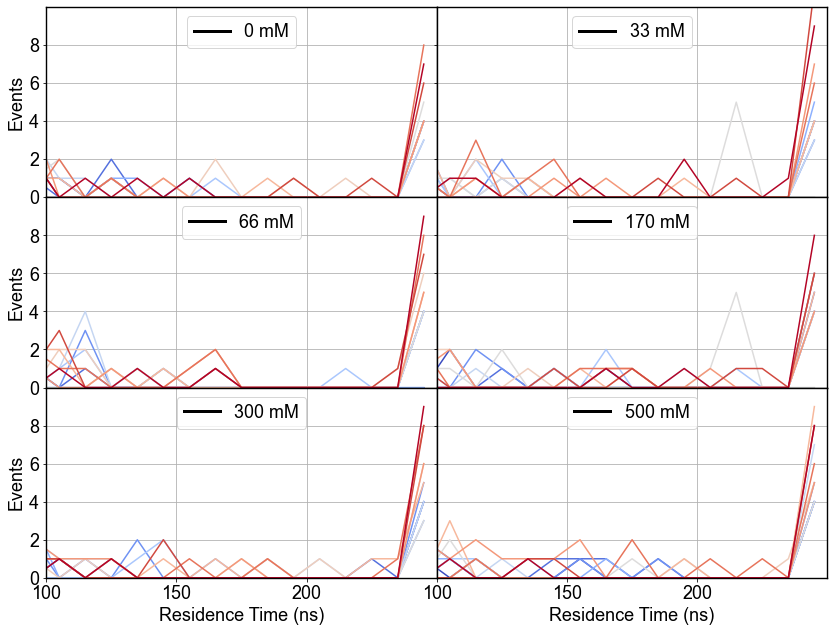

In [18]:
print("The red-er the closer the NPs")
n_cols = 2
n_rows = len(all_residences)//n_cols
initial_bins = np.arange(0,255,10)
subplot_kw = {'xlim':(100, 250), 'ylim':(0,10), 'yticks':np.arange(0,10,2), 'xticks':np.arange(100,250,50)}
gridspec_kw = {'hspace':0.0, 'wspace':0.0}
fig, axs = plt.subplots(figsize=(14, n_rows*3.5), ncols=n_cols, nrows=n_rows, sharex=True, sharey=True, subplot_kw=subplot_kw, gridspec_kw=gridspec_kw)
for ax, residences, ion in zip(axs.flatten(), all_residences, i_vals):
    ax.plot([], [], c='k', lw=3, label="{} mM".format(ion))
    ax.legend(fontsize=Z-4, loc="upper center")
    ax.grid()
    for c, residence in zip(c_cv1, residences):
        hist, bins = np.histogram(residence, bins=initial_bins)
        bins = (bins[1:] + bins[:-1])/2
        ax.plot(bins, hist, c=c, lw=1.5)
    
for ax in axs.flatten():
    ax.tick_params(labelsize=Z-4)
for ax in axs[-1,:]:
    ax.set_xlabel("Residence Time (ns)", fontsize=Z-4)
for ax in axs[:,0]:
    ax.set_ylabel("Events", fontsize=Z-4)
#plt.tight_layout()
#plt.savefig("ShortLongPMFhists.png", format='png', dpi=DPI)
plt.show()
plt.close()

# Brute ion removal and simulated annealing

In [19]:
PMFbrute = []
PMFbrute_hists = []
PMFann = []
PMFann_hists = []

for np_lab in np_labels:
    pmfbrute_ion = []
    pmfbrute_ion_hist = []
    pmfann_ion = []
    pmfann_ion_hist = []
    for ion_lab in ["I10", "I20"]:
        pmfbrute = read_file("T2/PMF_L_brute/T2-{}-{}_L_PMF_std.xvg".format(np_lab, ion_lab))
        pmfbrute = clean_pmf(pmfbrute, X)
        pmfbrute_ion.append(pmfbrute)
        pmfbrute_hist = read_file("T2/PMF_L_brute/T2-{}-{}_L_PMF_hist.xvg".format(np_lab, ion_lab))
        pmfbrute_ion_hist.append(pmfbrute_hist)
        
        pmfann = read_file("T2/PMF_L_ann/T2-{}-{}_L_PMF_std.xvg".format(np_lab, ion_lab))
        pmfann = clean_pmf(pmfann, X)
        pmfann_ion.append(pmfann)
        pmfann_hist = read_file("T2/PMF_L_ann/T2-{}-{}_L_PMF_hist.xvg".format(np_lab, ion_lab))
        pmfann_ion_hist.append(pmfann_hist)

    PMFbrute.append(pmfbrute_ion)
    PMFbrute_hists.append(pmfbrute_ion_hist)
    PMFann.append(pmfann_ion)
    PMFann_hists.append(pmfann_ion_hist)
PMFbrute = np.array(PMFbrute)
PMFann = np.array(PMFann)
print(np.shape(PMFbrute))
print(np.shape(PMFann))

(1, 2, 200, 3)
(1, 2, 200, 3)


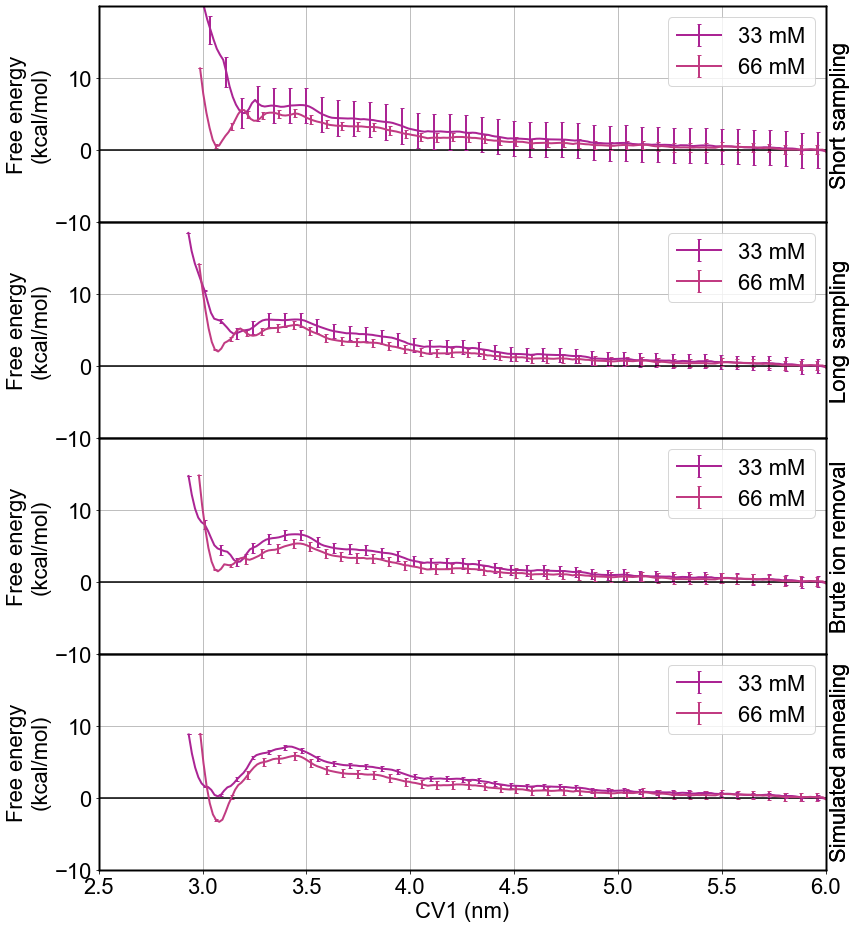

In [20]:
subplot_kw = {'xlim':(2.5, Xfin), 'ylim':(-10,20), 'yticks':[-10, 0, 10], 'xticks':np.arange(2.5, Xfin+0.01, 0.5)}
fig, axs = plt.subplots(figsize=(12,13), ncols=1, nrows=4, sharex=True, subplot_kw=subplot_kw, gridspec_kw={'wspace':0, 'hspace':0})
for ax in axs:
    ax.tick_params(labelsize=Z)
    ax.set_ylabel("Free energy\n(kcal/mol)", fontsize=Z)
    ax.grid()
    ax.axhline(y=0, c='k', lw=1.5)

for pmf, lab, c in zip(PMFshort[0,1:3,:,:], i_vals[1:3], c_ion[1:3]):
    axs[0].errorbar(pmf[:,0], pmf[:,1], yerr=pmf[:,2], c=c, label="{} mM".format(lab), lw=2, errorevery=5, capsize=2)
    ax2 = axs[0].twinx()
    ax2.set_ylabel("Short sampling", fontsize=Z)
    ax2.set_yticks([])

for pmf, lab, c in zip(PMFlong[0,1:3,:,:], i_vals[1:3], c_ion[1:3]):
    axs[1].errorbar(pmf[:,0], pmf[:,1], yerr=pmf[:,2], c=c, label="{} mM".format(lab), lw=2, errorevery=5, capsize=2)
    ax2 = axs[1].twinx()
    ax2.set_ylabel("Long sampling", fontsize=Z)
    ax2.set_yticks([])

for pmf, lab, c in zip(PMFbrute[0,:,:,:], i_vals[1:3], c_ion[1:3]):
    axs[2].errorbar(pmf[:,0], pmf[:,1], yerr=pmf[:,2], c=c, label="{} mM".format(lab), lw=2, errorevery=5, capsize=2)
    ax2 = axs[2].twinx()
    ax2.set_ylabel("Brute ion removal", fontsize=Z)
    ax2.set_yticks([])
    
for pmf, lab, c in zip(PMFann[0,:,:,:], i_vals[1:3], c_ion[1:3]):
    axs[3].errorbar(pmf[:,0], pmf[:,1], yerr=pmf[:,2], c=c, label="{} mM".format(lab), lw=2, errorevery=5, capsize=2)
    ax2 = axs[3].twinx()
    ax2.set_ylabel("Simulated annealing", fontsize=Z)
    ax2.set_yticks([])

axs[-1].set_xlabel("CV1 (nm)", fontsize=Z)
for ax in axs:
    ax.legend(fontsize=Z, loc='upper right')
plt.tight_layout()
plt.show()
plt.close()
#plt.savefig("ShortLongPMF.png", format='png', dpi=DPI)

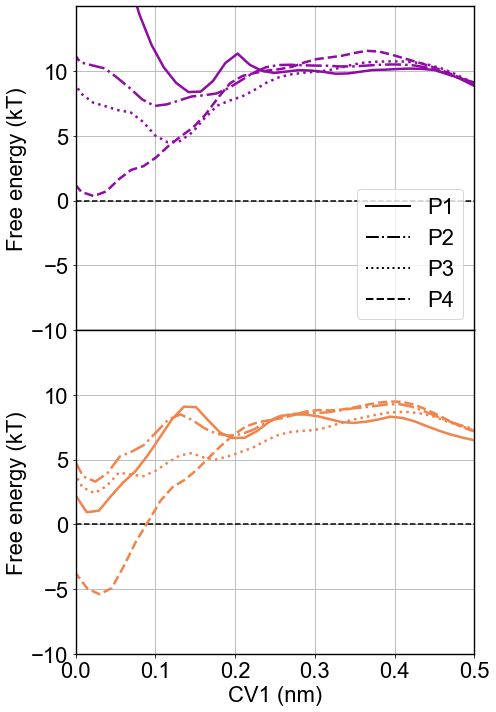

In [32]:
KT=0.616879
LW=2.5
subplot_kw = {'xlim':(0, 0.5), 'ylim':(-10, 15), 'yticks':[-10, -5, 0, 5, 10]}
fig, axs = plt.subplots(figsize=(7,10), ncols=1, nrows=2, sharex=True, subplot_kw=subplot_kw, gridspec_kw={'wspace':0, 'hspace':0})
for ax in axs:
    ax.grid()
    ax.tick_params(labelsize=Z)
    ax.set_ylabel("Free energy (kT)", fontsize=Z)
    ax.axhline(y=0, c='k', lw=1.5, ls='--')
    ax.plot([],[], lw=2, ls='-', label="P1", c='k')
    ax.plot([],[], lw=2, ls='-.', label="P2", c='k')
    ax.plot([],[], lw=2, ls=':', label="P3", c='k')
    ax.plot([],[], lw=2, ls='--', label="P4", c='k')
axs[-1].set_xlabel("CV1 (nm)", fontsize=Z)

axs[0].errorbar(PMFshort[0,1,:,0]-3.05, PMFshort[0,1,:,1]/KT, c=c_ion[0], lw=LW, errorevery=5, capsize=1.5, ls='-')
axs[0].errorbar(PMFlong[0,1,:,0]-3.05, PMFlong[0,1,:,1]/KT, c=c_ion[0], lw=LW, errorevery=5, capsize=1.5, ls='-.')
axs[0].errorbar(PMFbrute[0,0,:,0]-3.05, PMFbrute[0,0,:,1]/KT, c=c_ion[0], lw=LW, errorevery=5, capsize=1.5, ls=':')
axs[0].errorbar(PMFann[0,0,:,0]-3.05, PMFann[0,0,:,1]/KT, c=c_ion[0], lw=LW, errorevery=5, capsize=1.5, ls='--')

axs[1].errorbar(PMFshort[0,2,:,0]-3.05, PMFshort[0,2,:,1]/KT, c=c_ion[5], lw=LW, errorevery=5, capsize=1.5, ls='-')
axs[1].errorbar(PMFlong[0,2,:,0]-3.05, PMFlong[0,2,:,1]/KT, c=c_ion[5], lw=LW, errorevery=5, capsize=1.5, ls='-.')
axs[1].errorbar(PMFbrute[0,1,:,0]-3.05, PMFbrute[0,1,:,1]/KT, c=c_ion[5], lw=LW, errorevery=5, capsize=1.5, ls=':')
axs[1].errorbar(PMFann[0,1,:,0]-3.05, PMFann[0,1,:,1]/KT, c=c_ion[5], lw=LW, errorevery=5, capsize=1.5, ls='--')

a = axs[0].legend(fontsize=Z, loc='lower right')#, bbox_to_anchor=(1,0.5))
plt.tight_layout()
plt.savefig("SamplingProtocols.png", format='png', dpi=DPI)
plt.show()
plt.close()

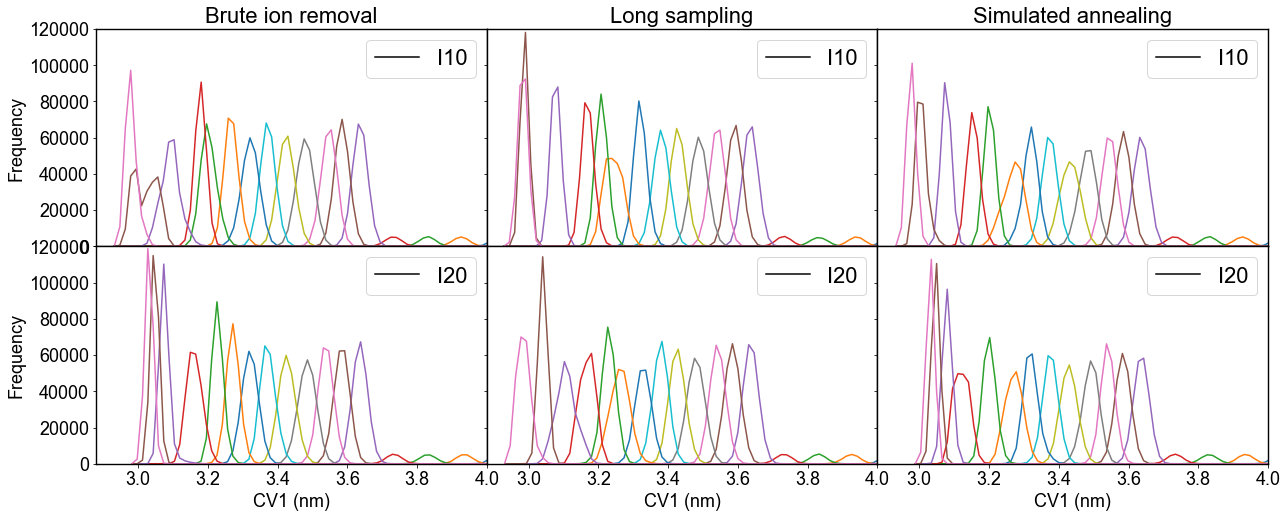

In [24]:
n_cols = 3
n_rows = 2
subplot_kw = {'xlim':(Xini, 4), 'ylim':(0,120000)}
gridspec_kw = {'hspace':0.0, 'wspace':0.0}
fig, axs = plt.subplots(figsize=(7*n_cols, n_rows*4), ncols=n_cols, nrows=n_rows, sharey=True, sharex=True, subplot_kw=subplot_kw, gridspec_kw=gridspec_kw)
axs[0,0].set_title("Brute ion removal", fontsize=Z)
axs[0,1].set_title("Long sampling", fontsize=Z)
axs[0,2].set_title("Simulated annealing", fontsize=Z)
for ax, hist_brute, hist_long, hist_ann, lab in zip(axs, PMFbrute_hists[0], PMFlong_hists[0], PMFann_hists[0], ion_labels[1:3]):
    ax[0].plot([],[],'k', label=lab)
    ax[0].legend(fontsize=Z, loc='upper right')
    ax[1].plot([],[],'k', label=lab)
    ax[1].legend(fontsize=Z, loc='upper right')  
    ax[2].plot([],[],'k', label=lab)
    ax[2].legend(fontsize=Z, loc='upper right')  
    for j in range(len(hist_brute[0,:])):
        ax[0].plot(hist_brute[:,0], hist_brute[:,j])
    for j in range(len(hist_long[0,:])):
        ax[1].plot(hist_long[:,0], hist_long[:,j])
    for j in range(len(hist_long[0,:])):
        ax[2].plot(hist_ann[:,0], hist_ann[:,j])
for ax in axs.flatten():
    ax.tick_params(labelsize=Z-4)
for ax in axs[:,0]:
    ax.set_ylabel("Frequency", fontsize=Z-4)
for ax in axs[-1,:]:
    ax.set_xlabel("CV1 (nm)", fontsize=Z-4)
    
plt.show()
#plt.tight_layout()
#plt.savefig("ShortLongPMFhists.png", format='png', dpi=DPI)
plt.close()